# **Handcrafted Features & Fully Connected NN**

The following code train a fully convolutional neural network model with handcrafted features.When applied to the test set, the model achieves an accuracy of 77% and an F1 (macro) score of 74.7% (with initial units 512 and batch size 64).

In [1]:
# Importing the drive module from google.colab library
from google.colab import drive

# Mounting the Google Drive to the Colab environment
drive.mount('/content/drive')

project_path = '/content/drive/My Drive/GitHub/MarineMammalSoundClassification/'
%cd /content/drive/My Drive/GitHub/MarineMammalSoundClassification/

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1oJSL58N419Ve8pd0wCvgXEy52hLM2tJN/MarineMammalSoundClassification


## **Fully Connected Neural Network**

A fully connected neural network consists of a series of fully connected layers that connect every neuron in one layer to every neuron in the other layer. The [TensorFlow](https://www.tensorflow.org/) library was used to set up and train the model.

In [3]:
import warnings
warnings.filterwarnings("ignore")

import os
import pandas as pd
import numpy as np
from utils.NN_functions import load_data, create_model, train_model, evaluate_model, save_model, load_model
from utils.display import display_model_evaluation
from utils.utilities import ensure_dir

In [4]:
trainX, trainY, _ = load_data('handcrafted_features/train_features.csv')
valX, valY, _ = load_data('handcrafted_features/val_features.csv')

def process_pipeline(model_name, initial_units=2048, batch_norm=True, dropout=False, epochs=100, batch_size=32, patience=5):
    """
    Performs the entire pipeline of processing, training, evaluating, and saving a neural network model.

    Args:
    model_name (str): The name to be used for saving the model and HTML output.
    initial_units (int, optional): The number of units in the first dense layer. Defaults to 2048.
    batch_norm (bool, optional): Whether to include batch normalization layers. Defaults to True.
    dropout (bool, optional): Whether to include dropout layers. Defaults to False.
    epochs (int, optional): The number of epochs to train the model. Defaults to 100.
    batch_size (int, optional): The batch size to use during training. Defaults to 32.
    patience (int, optional): The number of epochs with no improvement after which training will be stopped. Defaults to 5.
    """
    # Create and train the model
    model = create_model(initial_units, trainX.shape[1], 28, batch_norm, dropout)
    history = train_model(model, trainX, trainY, valX, valY, epochs, batch_size, patience)

    # Create directory for saving models if it doesn't exist
    ensure_dir('models/NN')

    # Save the trained model
    model_path = os.path.join('models/NN', model_name+'.keras')
    save_model(model, model_path)

    # Load the saved model
    loaded_model = load_model(model_path)

    # Load test data and evaluate the model
    testX, testY, encoder = load_data('handcrafted_features/test_features.csv')
    conf_matrix, accuracy, f1 = evaluate_model(loaded_model, testX, testY)

    labels = list(encoder.classes_)

    display_model_evaluation('NN', f'initial_units = {initial_units} | batch_norm = {batch_norm} | dropout = {dropout} | epochs = {epochs} | batch_size = {batch_size} | patience = {patience}',\
                          history.history, accuracy, f1, conf_matrix, labels)

Epoch 1/150
40/40 [==============================] - 6s 63ms/step - loss: 3.4259 - accuracy: 0.0861 - val_loss: 7.4511 - val_accuracy: 0.0500 - lr: 0.0010
Epoch 2/150
40/40 [==============================] - 2s 56ms/step - loss: 3.0779 - accuracy: 0.1427 - val_loss: 3.7921 - val_accuracy: 0.0357 - lr: 0.0010
Epoch 3/150
40/40 [==============================] - 3s 70ms/step - loss: 2.9034 - accuracy: 0.1659 - val_loss: 3.3856 - val_accuracy: 0.0714 - lr: 0.0010
Epoch 4/150
40/40 [==============================] - 3s 79ms/step - loss: 2.7418 - accuracy: 0.2137 - val_loss: 3.2250 - val_accuracy: 0.1000 - lr: 0.0010
Epoch 5/150
40/40 [==============================] - 2s 55ms/step - loss: 2.5953 - accuracy: 0.2504 - val_loss: 3.0741 - val_accuracy: 0.1500 - lr: 0.0010
Epoch 6/150
40/40 [==============================] - 2s 50ms/step - loss: 2.5193 - accuracy: 0.2632 - val_loss: 3.2021 - val_accuracy: 0.1214 - lr: 0.0010
Epoch 7/150
40/40 [==============================] - 2s 49ms/step - lo

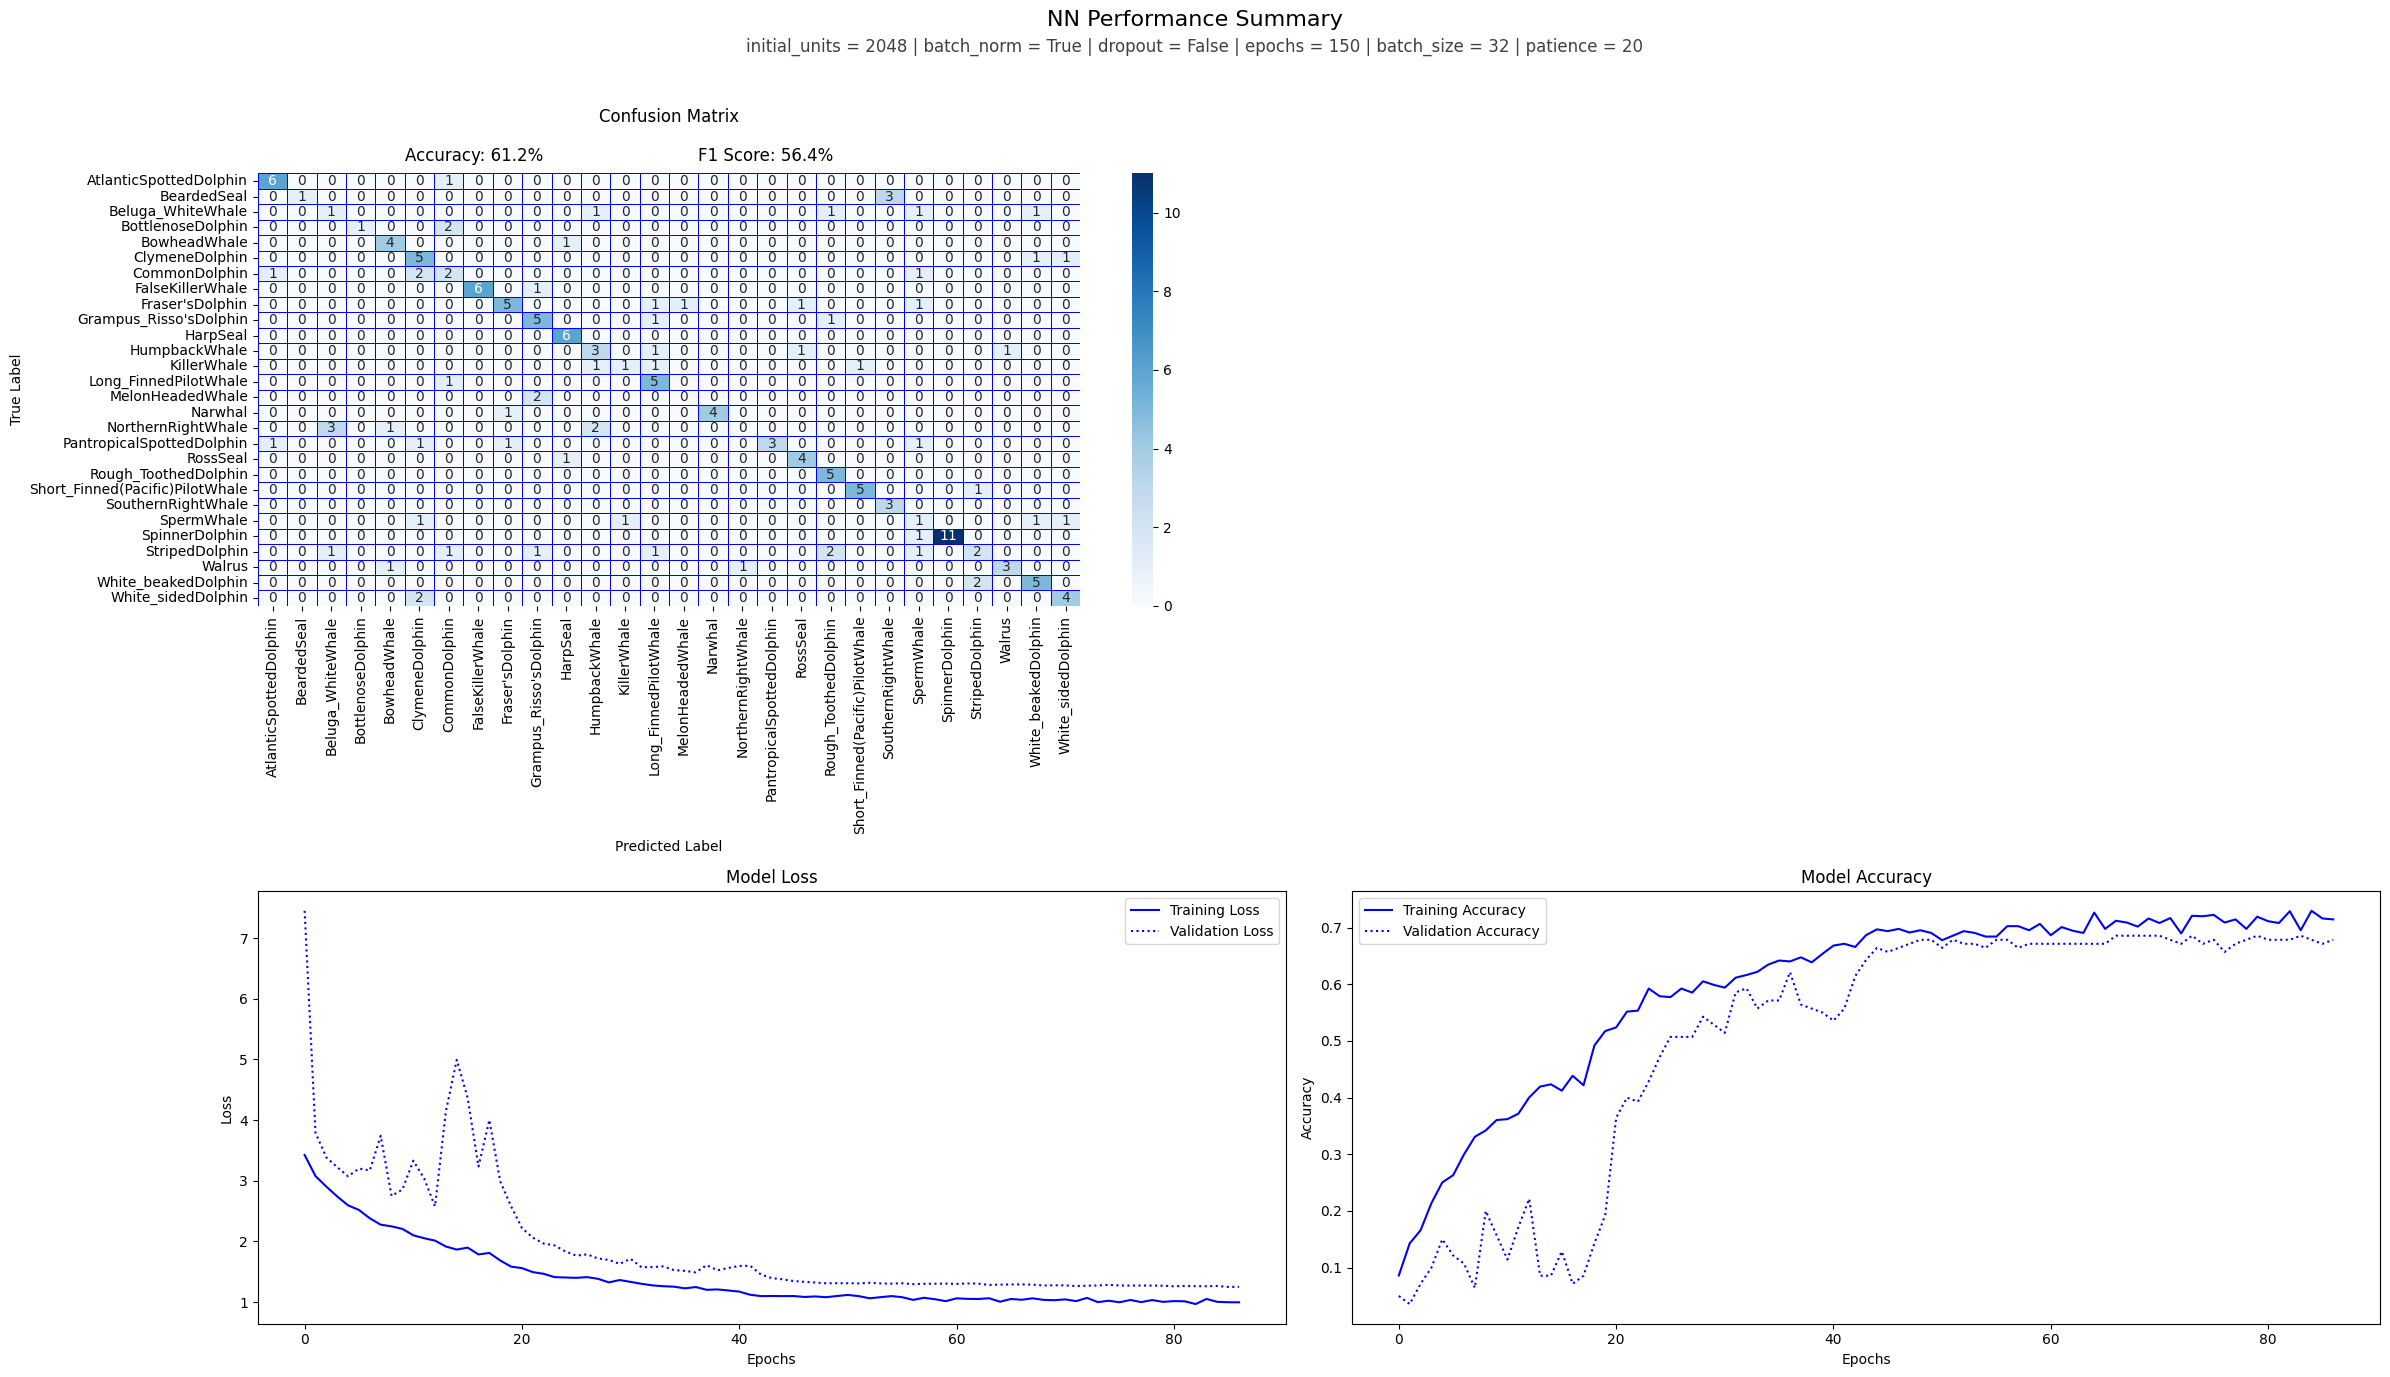

In [ ]:
process_pipeline('2048_150_32_20', 2048, True, False, 150, 32, 20)

Epoch 1/150
40/40 [==============================] - 5s 40ms/step - loss: 3.2191 - accuracy: 0.1348 - val_loss: 4.6364 - val_accuracy: 0.0357 - lr: 0.0010
Epoch 2/150
40/40 [==============================] - 1s 30ms/step - loss: 2.8722 - accuracy: 0.2153 - val_loss: 3.4968 - val_accuracy: 0.0429 - lr: 0.0010
Epoch 3/150
40/40 [==============================] - 1s 30ms/step - loss: 2.6574 - accuracy: 0.2560 - val_loss: 3.2891 - val_accuracy: 0.0786 - lr: 0.0010
Epoch 4/150
40/40 [==============================] - 1s 19ms/step - loss: 2.5132 - accuracy: 0.2911 - val_loss: 3.1465 - val_accuracy: 0.1214 - lr: 0.0010
Epoch 5/150
40/40 [==============================] - 1s 19ms/step - loss: 2.3231 - accuracy: 0.3341 - val_loss: 3.1883 - val_accuracy: 0.1143 - lr: 0.0010
Epoch 6/150
40/40 [==============================] - 1s 18ms/step - loss: 2.2739 - accuracy: 0.3469 - val_loss: 2.9649 - val_accuracy: 0.1357 - lr: 0.0010
Epoch 7/150
40/40 [==============================] - 1s 18ms/step - lo

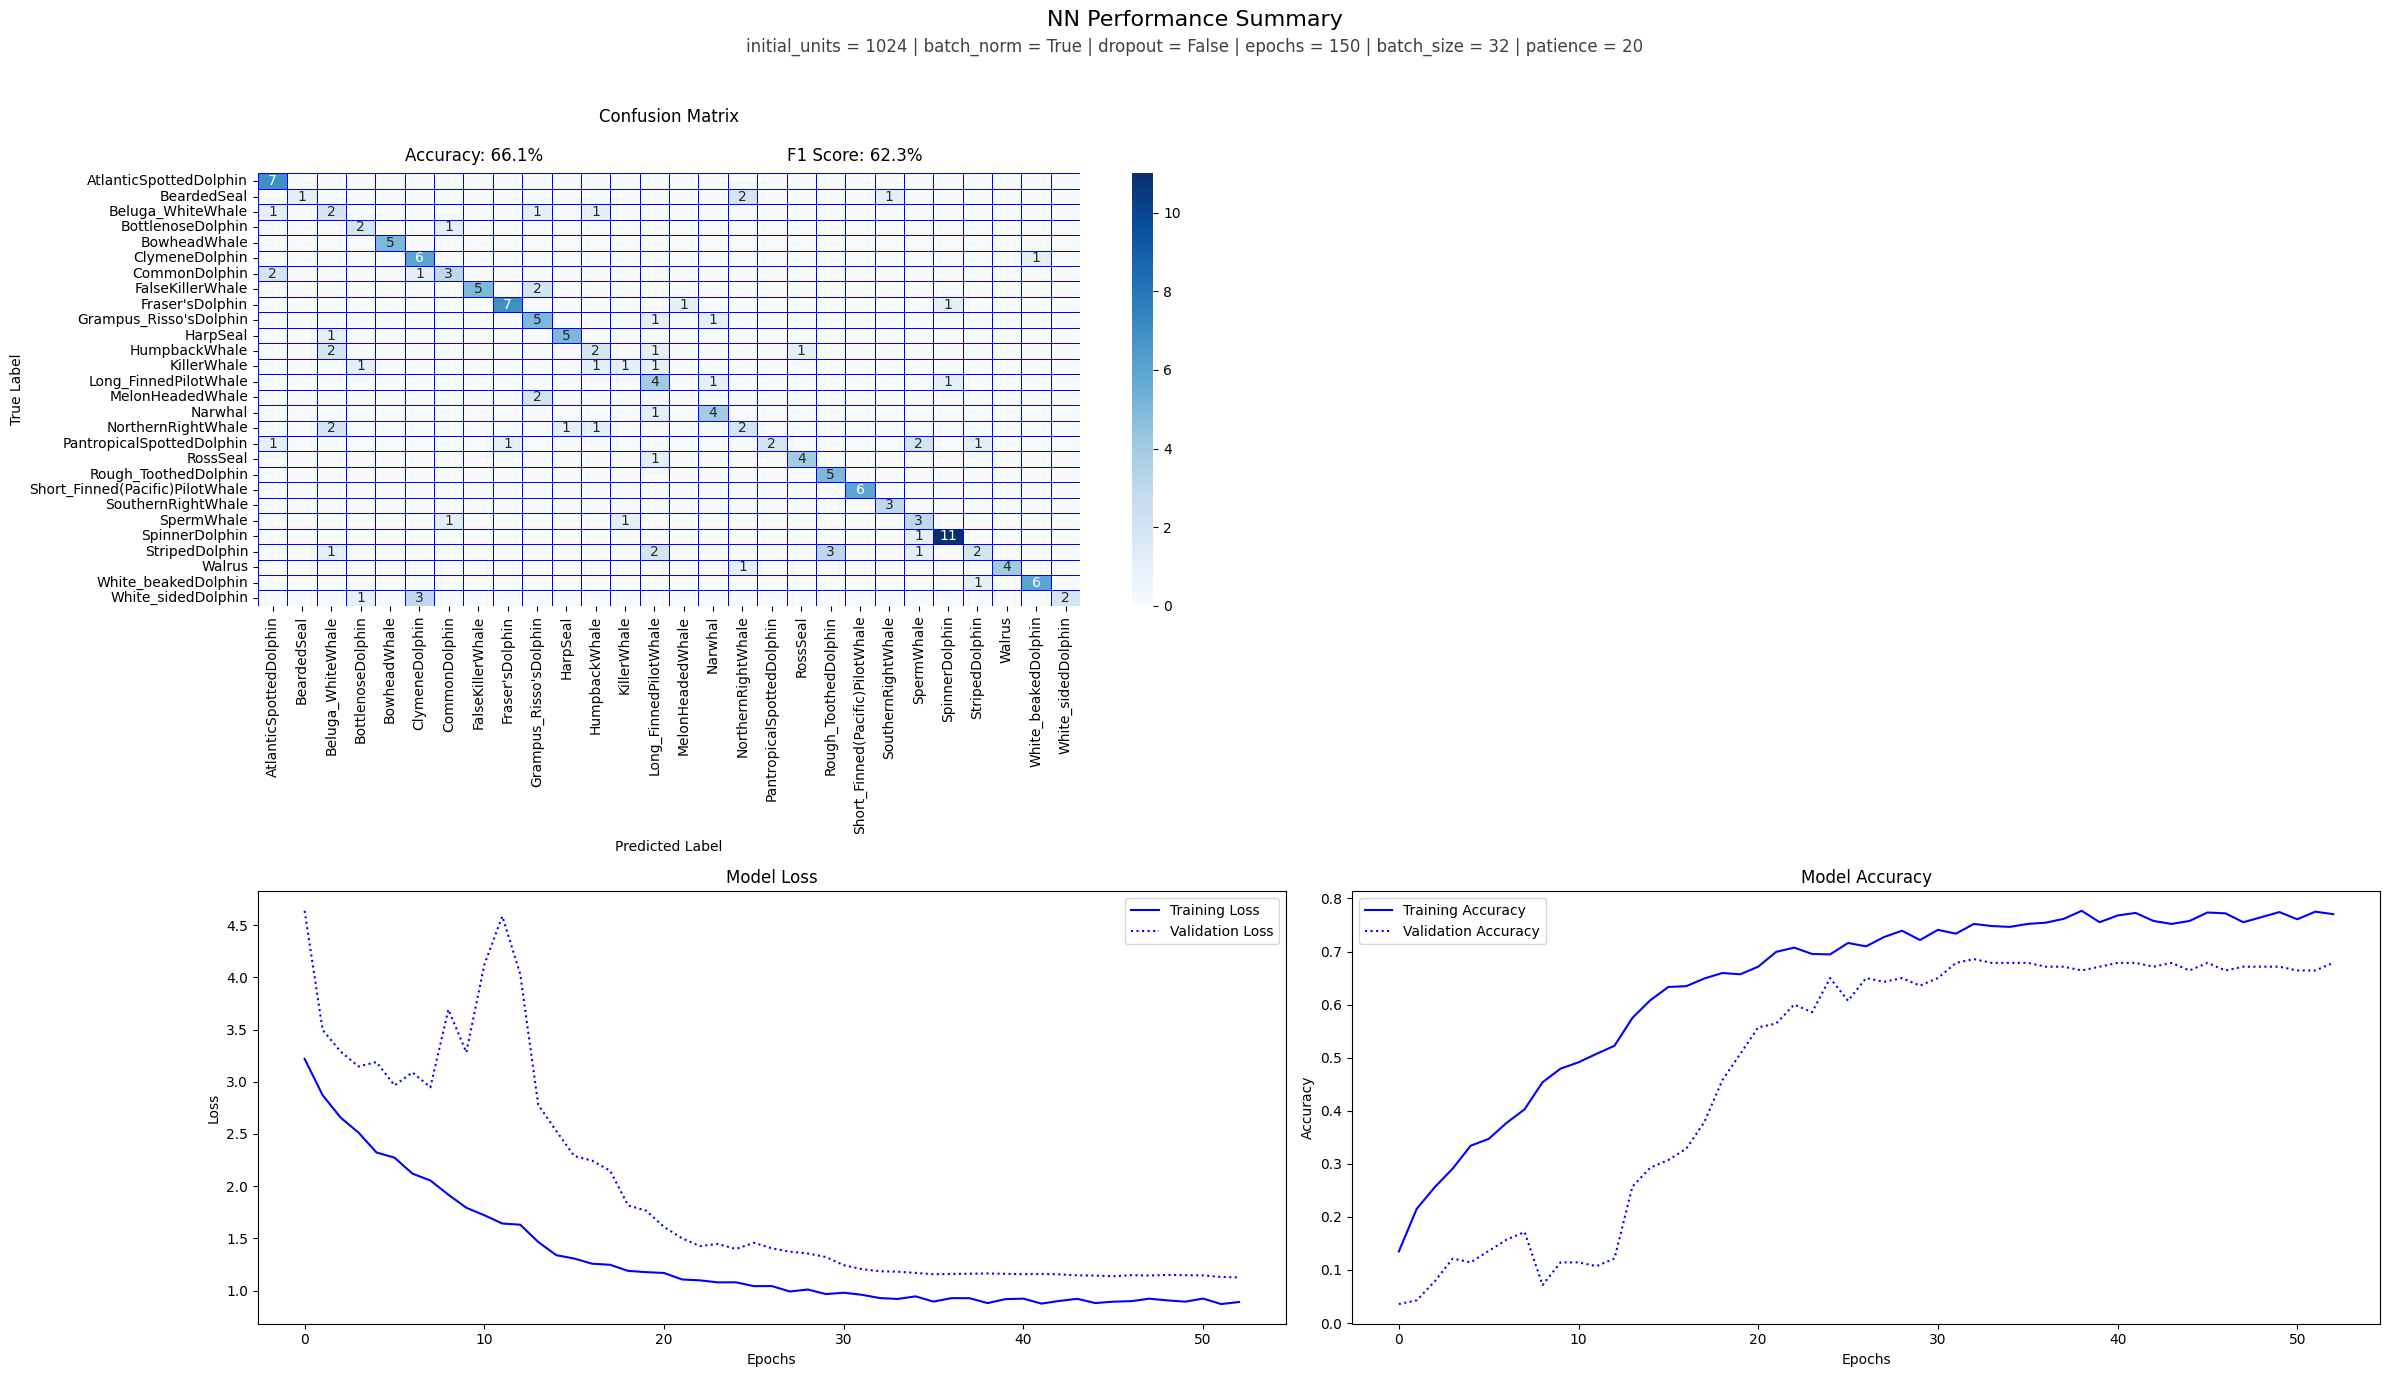

In [5]:
process_pipeline('1024_150_32_20', 1024, True, False, 150, 32, 20)

Epoch 1/150
79/79 [==============================] - 5s 13ms/step - loss: 3.3096 - accuracy: 0.1021 - val_loss: 3.6582 - val_accuracy: 0.0714 - lr: 0.0010
Epoch 2/150
79/79 [==============================] - 1s 10ms/step - loss: 2.8647 - accuracy: 0.1786 - val_loss: 3.3249 - val_accuracy: 0.0643 - lr: 0.0010
Epoch 3/150
79/79 [==============================] - 1s 9ms/step - loss: 2.6516 - accuracy: 0.2448 - val_loss: 3.1281 - val_accuracy: 0.0786 - lr: 0.0010
Epoch 4/150
79/79 [==============================] - 1s 8ms/step - loss: 2.5559 - accuracy: 0.2648 - val_loss: 3.1659 - val_accuracy: 0.1071 - lr: 0.0010
Epoch 5/150
79/79 [==============================] - 1s 9ms/step - loss: 2.4182 - accuracy: 0.3174 - val_loss: 2.9032 - val_accuracy: 0.1643 - lr: 0.0010
Epoch 6/150
79/79 [==============================] - 1s 9ms/step - loss: 2.3196 - accuracy: 0.3222 - val_loss: 2.8344 - val_accuracy: 0.1643 - lr: 0.0010
Epoch 7/150
79/79 [==============================] - 1s 9ms/step - loss: 2

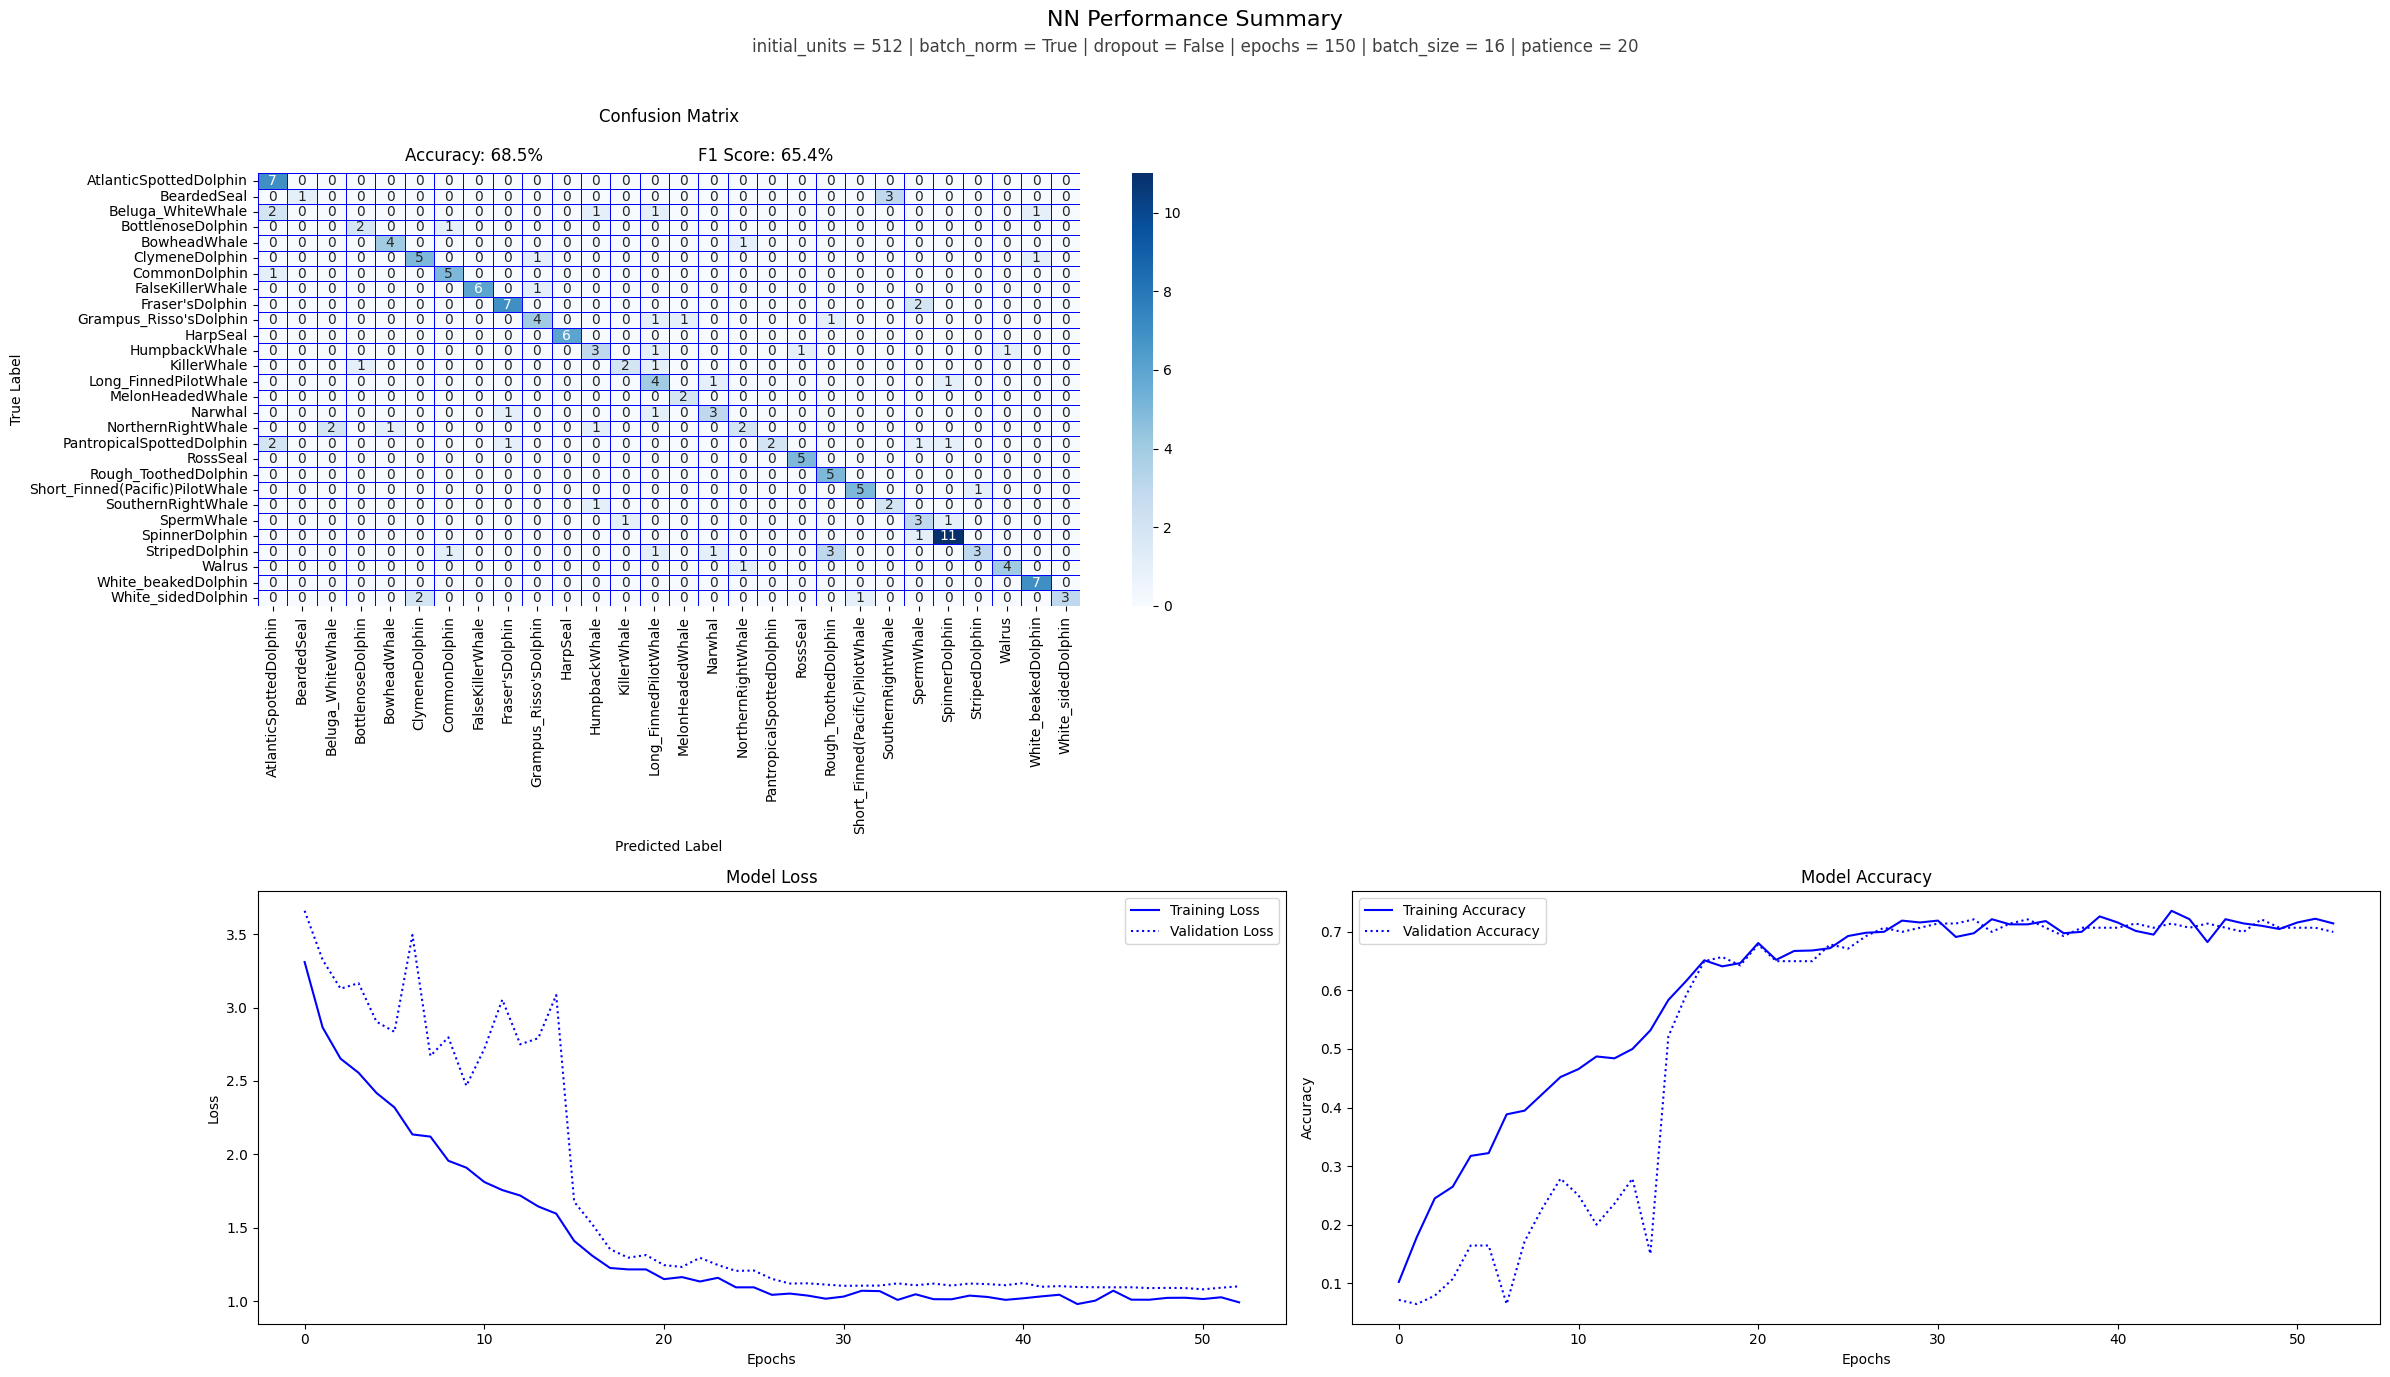

In [ ]:
process_pipeline('512_150_16_20', 512, True, False, 150, 16, 20)

Epoch 1/150
40/40 [==============================] - 3s 16ms/step - loss: 3.3048 - accuracy: 0.1276 - val_loss: 3.8644 - val_accuracy: 0.0357 - lr: 0.0010
Epoch 2/150
40/40 [==============================] - 0s 10ms/step - loss: 2.8133 - accuracy: 0.2097 - val_loss: 3.3510 - val_accuracy: 0.0571 - lr: 0.0010
Epoch 3/150
40/40 [==============================] - 0s 10ms/step - loss: 2.5195 - accuracy: 0.3062 - val_loss: 3.1961 - val_accuracy: 0.1000 - lr: 0.0010
Epoch 4/150
40/40 [==============================] - 0s 9ms/step - loss: 2.3359 - accuracy: 0.3437 - val_loss: 3.0877 - val_accuracy: 0.1571 - lr: 0.0010
Epoch 5/150
40/40 [==============================] - 0s 10ms/step - loss: 2.2462 - accuracy: 0.3557 - val_loss: 3.1871 - val_accuracy: 0.0929 - lr: 0.0010
Epoch 6/150
40/40 [==============================] - 0s 9ms/step - loss: 2.0829 - accuracy: 0.4171 - val_loss: 2.9561 - val_accuracy: 0.1000 - lr: 0.0010
Epoch 7/150
40/40 [==============================] - 0s 9ms/step - loss:

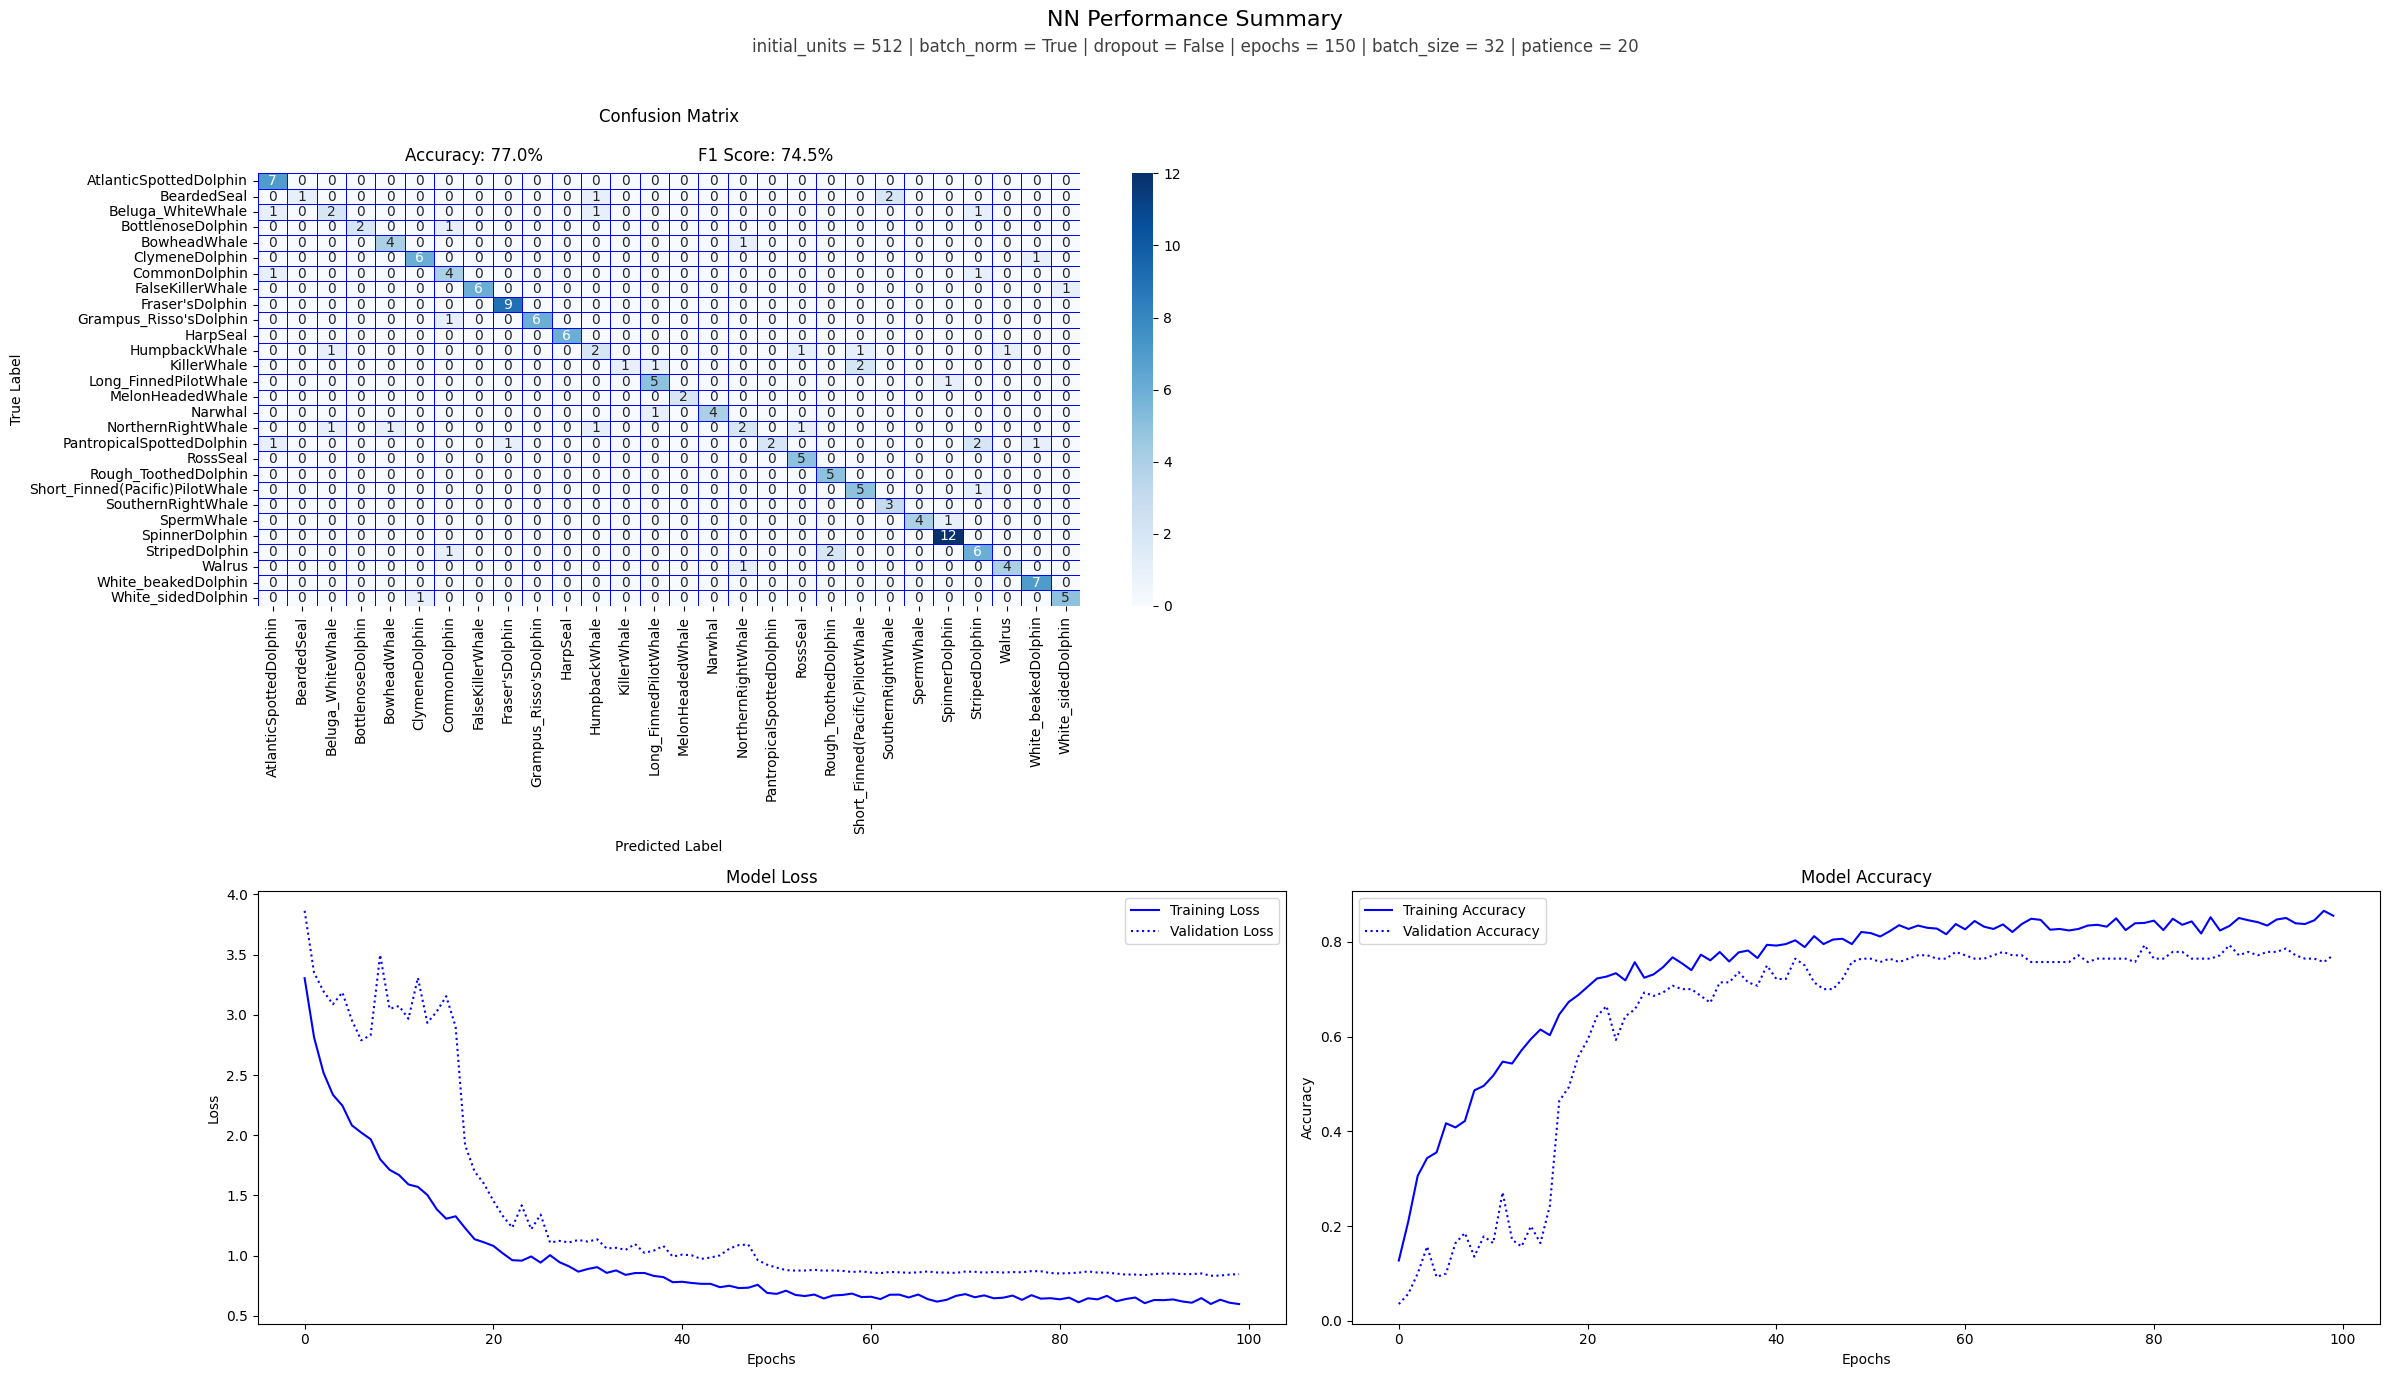

In [ ]:
process_pipeline('512_150_32_20', 512, True, False, 150, 32, 20)

Epoch 1/150
20/20 [==============================] - 4s 35ms/step - loss: 3.3395 - accuracy: 0.1085 - val_loss: 3.9624 - val_accuracy: 0.0500 - lr: 0.0010
Epoch 2/150
20/20 [==============================] - 0s 11ms/step - loss: 2.8338 - accuracy: 0.2281 - val_loss: 3.8494 - val_accuracy: 0.0500 - lr: 0.0010
Epoch 3/150
20/20 [==============================] - 0s 13ms/step - loss: 2.6159 - accuracy: 0.2871 - val_loss: 3.4891 - val_accuracy: 0.0571 - lr: 0.0010
Epoch 4/150
20/20 [==============================] - 0s 12ms/step - loss: 2.4063 - accuracy: 0.3381 - val_loss: 3.3523 - val_accuracy: 0.0571 - lr: 0.0010
Epoch 5/150
20/20 [==============================] - 0s 11ms/step - loss: 2.2109 - accuracy: 0.3907 - val_loss: 3.2904 - val_accuracy: 0.0429 - lr: 0.0010
Epoch 6/150
20/20 [==============================] - 0s 12ms/step - loss: 2.0861 - accuracy: 0.4234 - val_loss: 3.1967 - val_accuracy: 0.0857 - lr: 0.0010
Epoch 7/150
20/20 [==============================] - 0s 12ms/step - lo

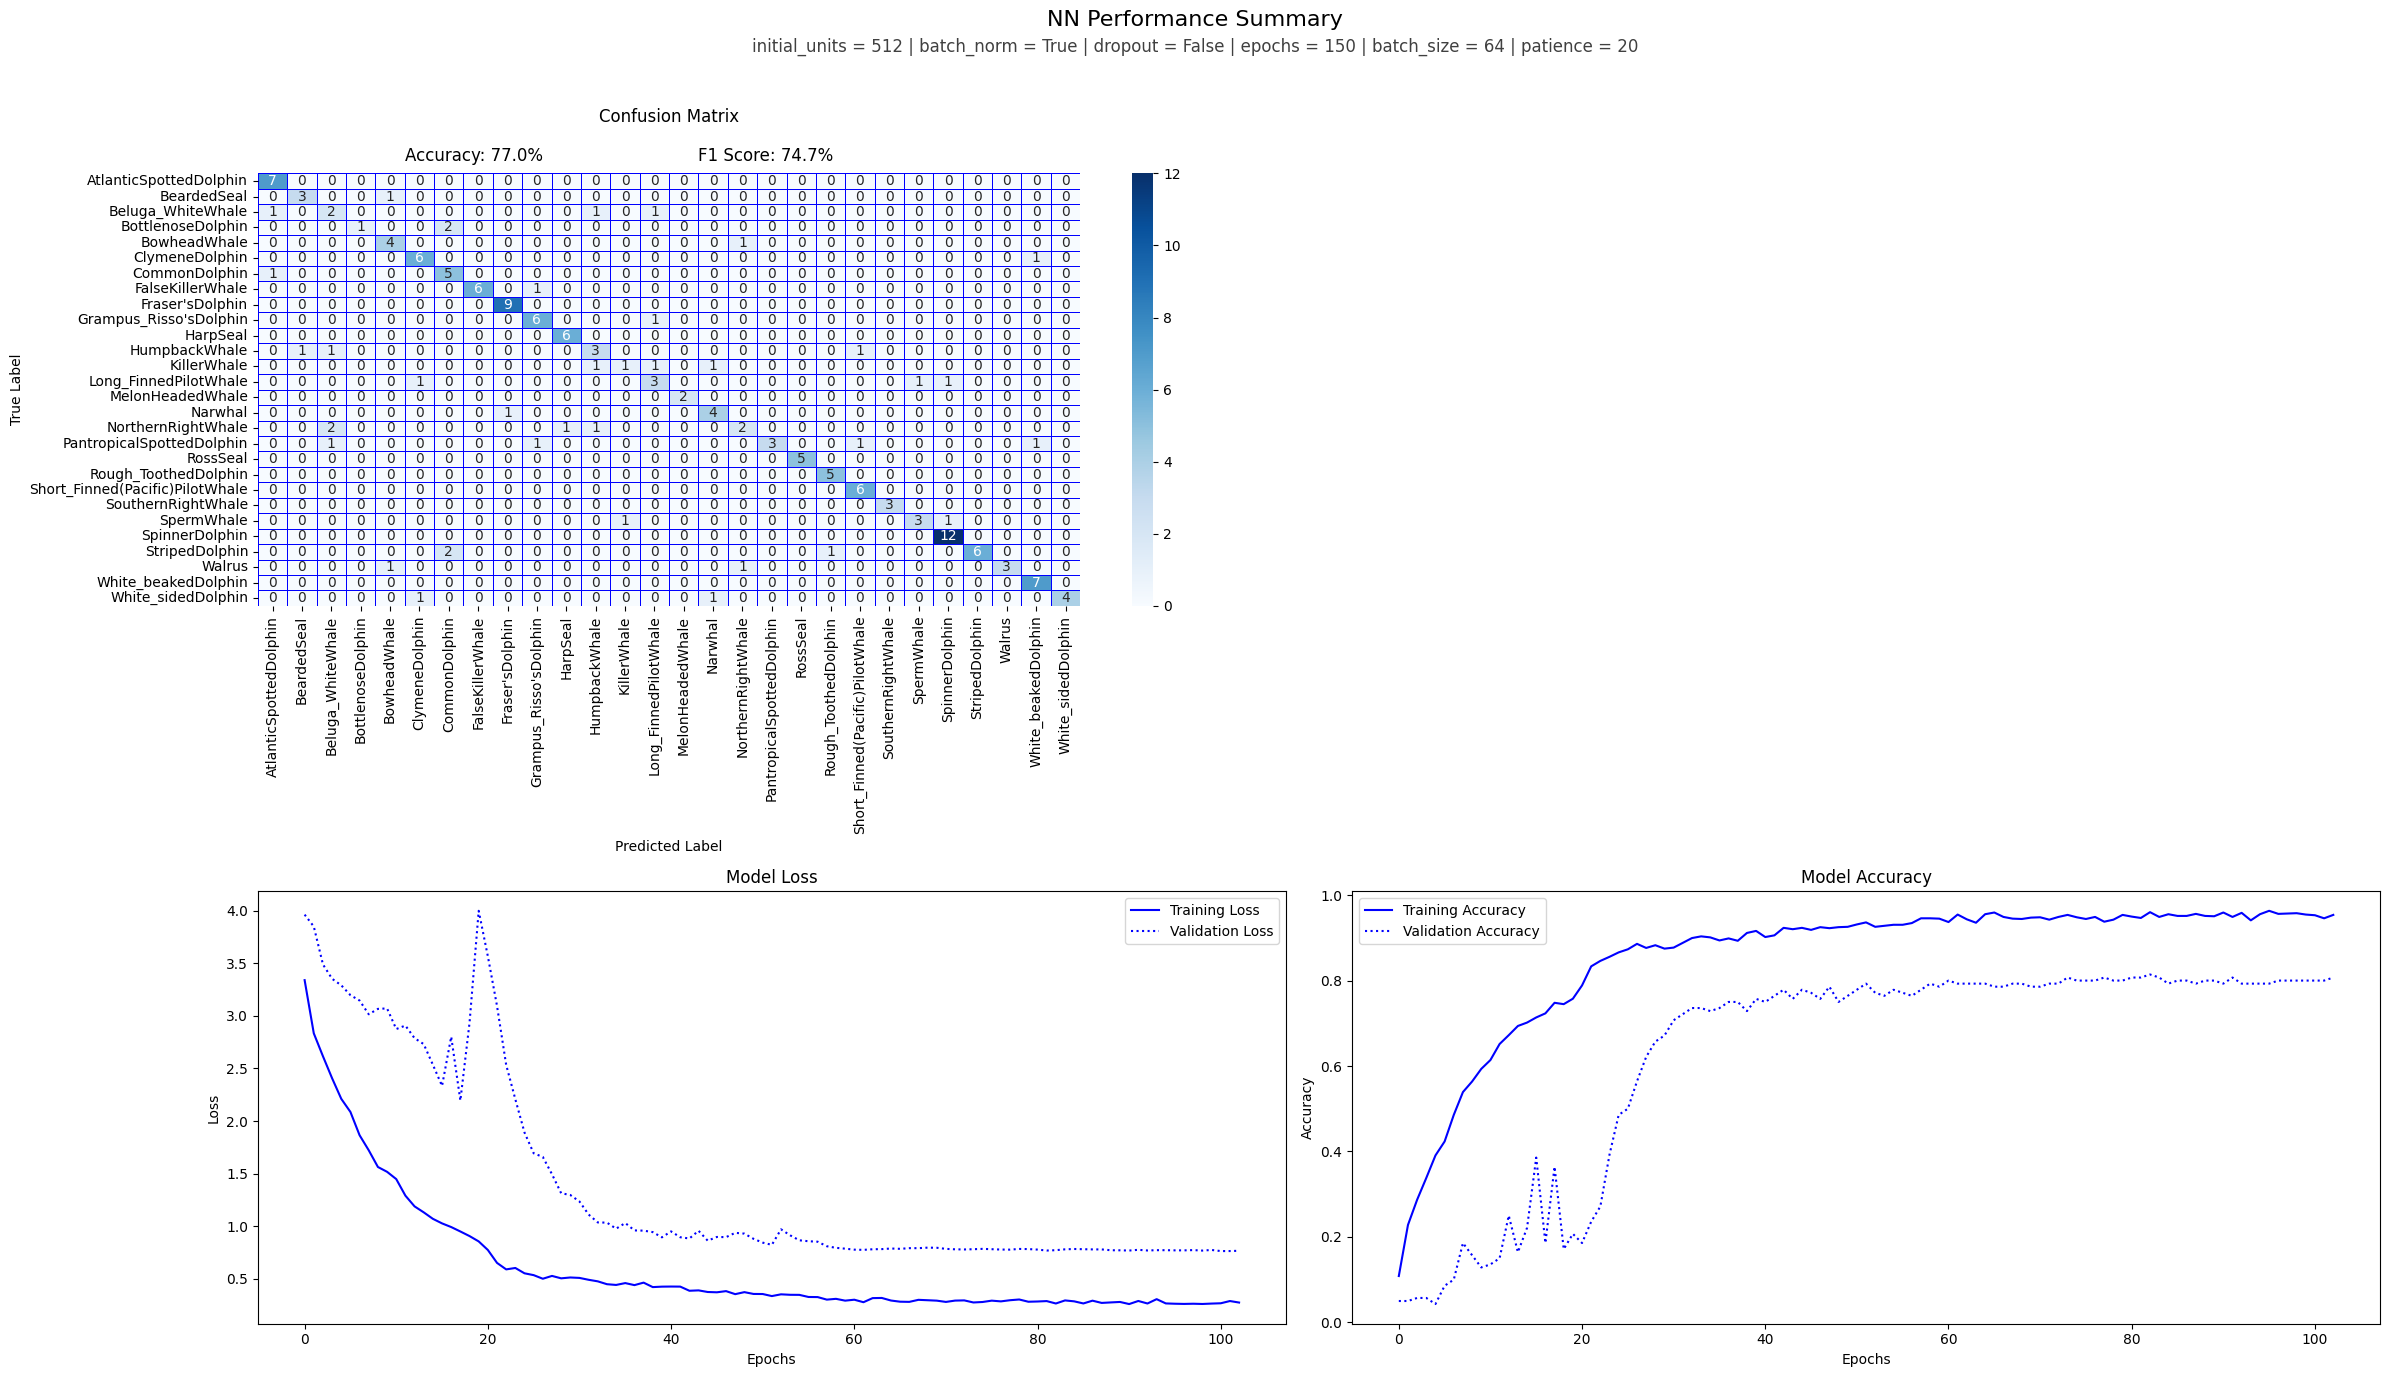

In [ ]:
process_pipeline('512_150_64_20', 512, True, False, 150, 64, 20)